In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df=pd.read_csv(r'C:\Users\himan\Desktop\project\Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [9]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [10]:
# lets check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [19]:
# lets cahnge the datatype of order date from object to date time
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y", errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     5952 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [25]:
#applying groupby function to group the data based on catagory
da = df.groupby("Category")


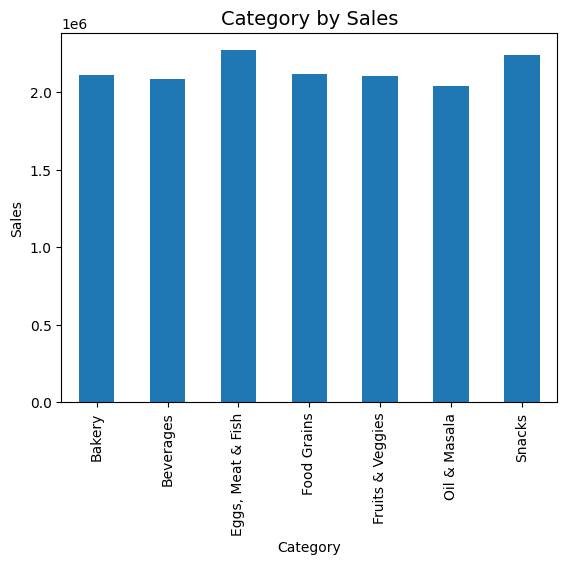

In [27]:
Sales_category = df.groupby("Category")["Sales"].sum()
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [34]:

df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year

In [35]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,NaT,North,1254,0.12,401.28,Tamil Nadu,NaN,NaN,NaN
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,NaT,South,749,0.18,149.80,Tamil Nadu,NaN,NaN,NaN
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,NaT,West,2360,0.21,165.20,Tamil Nadu,NaN,NaN,NaN
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,NaT,South,896,0.25,89.60,Tamil Nadu,NaN,NaN,NaN
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,NaT,South,2355,0.26,918.45,Tamil Nadu,NaN,NaN,NaN


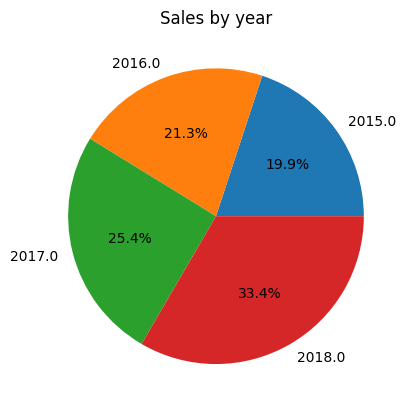

In [37]:
Yearly_Sales=df.groupby("year")["Sales"].sum()
plt.pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%')
plt.title('Sales by year')
plt.show()

In [ ]:
# link code

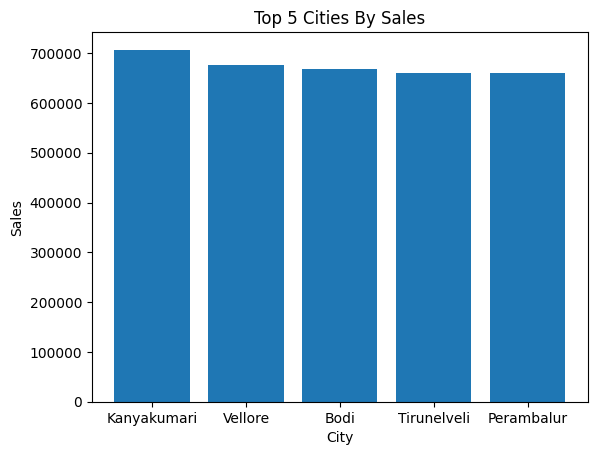

In [39]:
city_sales = df[['City', 'Sales']]
total_sales = city_sales.groupby('City').sum()
sorted_cities= total_sales.sort_values(by='Sales', ascending=False)
top_cities= sorted_cities.head(5)
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities By Sales')
plt.show()